In [1]:
import numpy as np
import pandas as pd

from util.directed_graph import DirectedGraph
from util.read_pairs_data import read_pairs_data
from util.graph_vis import GraphVisualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pairs_filename = "../data/100/100_0_pairs.txt"

In [3]:
pairs = read_pairs_data(pairs_filename)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,0,A,O,90
1,1,B,-,-1
2,2,A,O,90
3,3,A,A,92
4,4,A,B,5


In [4]:
pairs.tail()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
95,95,A,-,-1
96,96,B,O,5
97,97,B,O,5
98,98,AB,A,32
99,99,AB,A,5


In [5]:
grph = DirectedGraph(pairs.tail(20))

In [6]:
grph.adjacency

{80: [85, 91, 92, 93, 98, 99],
 81: [85, 91, 92, 93, 98, 99],
 83: [85, 91, 92, 93, 98, 99],
 84: [81],
 85: [80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99],
 86: [85, 91, 92, 93, 98, 99],
 87: [81],
 88: [81],
 89: [85, 91, 92, 93, 98, 99],
 90: [85, 91, 92, 93, 98, 99],
 91: [81],
 92: [81],
 93: [81],
 94: [85, 91, 92, 93, 98, 99],
 95: [85, 91, 92, 93, 98, 99],
 96: [81],
 97: [81]}

In [7]:
edges = []

for donor_idx in grph.adjacency:
    for recipient_idx in grph.adjacency[donor_idx]:
        edges.append([donor_idx, recipient_idx])

In [8]:
gv = GraphVisualization()

for from_, to_ in edges[:15]:
    gv.add_edge(from_, to_)

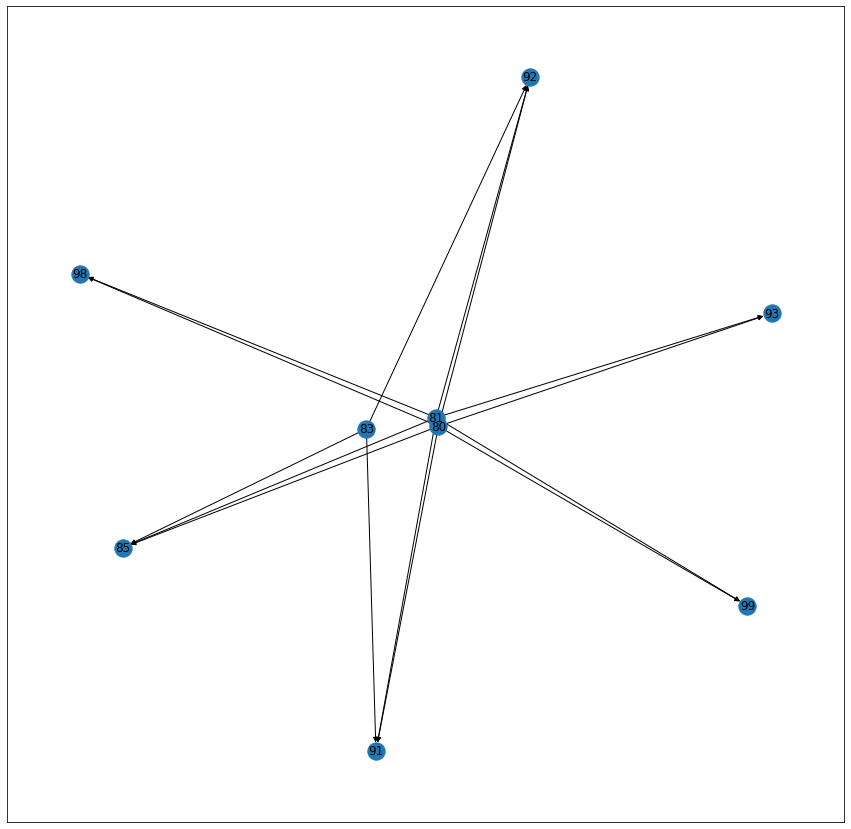

In [9]:
plt.figure(figsize=(15, 15))
gv.visualize()

In [10]:
cycles = grph.get_cycles()

In [11]:
cycles

[[80, 85],
 [80, 91, 81, 85],
 [80, 92, 81, 85],
 [80, 93, 81, 85],
 [81, 85, 80, 91],
 [81, 85, 80, 92],
 [81, 85, 80, 93],
 [81, 85],
 [81, 85, 83, 91],
 [81, 85, 83, 92],
 [81, 85, 83, 93],
 [81, 85, 84],
 [81, 85, 86, 91],
 [81, 85, 86, 92],
 [81, 85, 86, 93],
 [81, 85, 87],
 [81, 85, 88],
 [81, 85, 89, 91],
 [81, 85, 89, 92],
 [81, 85, 89, 93],
 [81, 85, 90, 91],
 [81, 85, 90, 92],
 [81, 85, 90, 93],
 [81, 85, 91],
 [81, 85, 92],
 [81, 85, 93],
 [81, 85, 94, 91],
 [81, 85, 94, 92],
 [81, 85, 94, 93],
 [81, 85, 96],
 [81, 85, 97],
 [81, 91],
 [81, 92],
 [81, 93],
 [83, 85],
 [83, 91, 81, 85],
 [83, 92, 81, 85],
 [83, 93, 81, 85],
 [84, 81, 85],
 [85, 80],
 [85, 80, 91, 81],
 [85, 80, 92, 81],
 [85, 80, 93, 81],
 [85, 81],
 [85, 83],
 [85, 83, 91, 81],
 [85, 83, 92, 81],
 [85, 83, 93, 81],
 [85, 84, 81],
 [85, 86],
 [85, 86, 91, 81],
 [85, 86, 92, 81],
 [85, 86, 93, 81],
 [85, 87, 81],
 [85, 88, 81],
 [85, 89],
 [85, 89, 91, 81],
 [85, 89, 92, 81],
 [85, 89, 93, 81],
 [85, 90],
 [85

In [12]:
for a in cycles[160]:
    print(pairs.iloc[a])

IndexError: list index out of range